
## USD vs EUR

In [33]:
%matplotlib inline

from datetime import datetime, timedelta
from pandas import Index
from pandas.io.data import DataReader
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
import requests

FIN_SERVICE_PROVIDER = 'yahoo'
PAST_DAYS = 60

# SYMBOL = ['IBM', 'AAPL']
SYMBOL = ['USD', 'EUR']

# today
t1 = datetime.now()
# two months later
t2 = t1 - timedelta(days=PAST_DAYS)

df1  = DataReader(SYMBOL[0],  FIN_SERVICE_PROVIDER , t2, t1)
df2  = DataReader(SYMBOL[1],  FIN_SERVICE_PROVIDER , t2, t1)


from datetime import datetime

print('Today {}'.format(datetime.now()))

Today 2015-05-19 11:57:32.983946


### USD

In [34]:
df1.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-20,92.85,96.37,92.85,95.68,3800,95.54559
2015-03-23,96.17,96.33,93.99,93.99,9000,93.85796
2015-03-24,95.23,95.23,93.12,93.25,1900,93.11900
2015-03-25,93.26,93.26,83.90,83.90,15300,83.90000
2015-03-26,81.70,85.30,79.39,84.51,11400,84.51000


### EUR

In [35]:
df2.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-20,33.09,33.20,32.53,33.00,825500,32.30
2015-03-23,33.00,33.16,32.71,32.87,494500,32.18
2015-03-24,32.98,32.98,32.61,32.69,439000,32.00
2015-03-25,32.73,32.87,32.00,32.29,283400,31.61
2015-03-26,32.27,32.27,31.47,31.50,403000,30.83


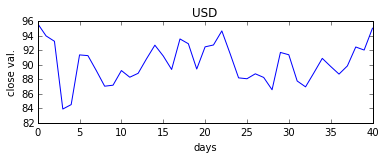

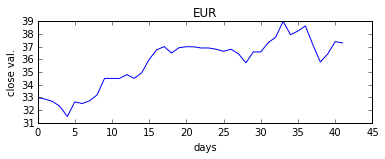

In [36]:
plt.figure(1)
plt.subplot(211)
plt.title(SYMBOL[0])
plt.xlabel('days')
plt.ylabel('close val.')
plt.plot(df1['Close'])

plt.figure(2)
plt.subplot(211)
plt.title(SYMBOL[1])
plt.xlabel('days')
plt.ylabel('close val.')
plt.plot(df2['Close'])

## Bitcoin History vs EUR

In [37]:
BIT_COIN_CSV_URL = 'http://www.quandl.com/api/v1/datasets/BCHARTS/KRAKENEUR.csv'

bcdf = read_csv(BIT_COIN_CSV_URL)
bcdf = bcdf[bcdf['Date']> t2.strftime("%Y-%m-%d")]
#bcdf = bcdf.iloc[::-1]
bcdf = bcdf.sort(['Date'], ascending=[True])
bcdf.index = Index(range(0, len(bcdf)))

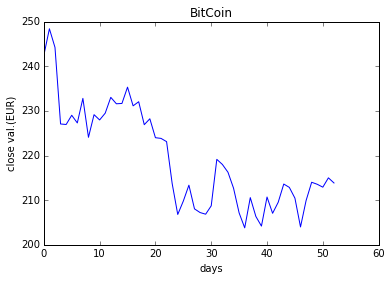

In [38]:
plt.title("BitCoin")
plt.xlabel('days')
plt.ylabel('close val.(EUR)')
plt.plot(bcdf['Close'])

### Close Price Statistics

#### Mean (in 60 Days)

In [39]:
bcdf['Close'].mean()

219.43077811320757

#### Variance (in 60 days)

In [40]:
bcdf['Close'].var()

129.17569550374844

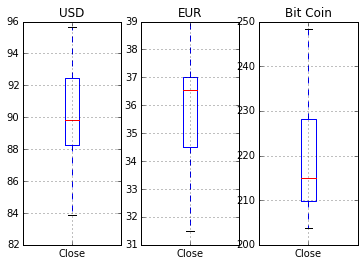

In [41]:
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax1.set_title(SYMBOL[0])
# ax1.title(SYMBOL[0])
ax1 = df1.boxplot(column='Close', return_type='axes')

ax2 = fig.add_subplot(1,3,2)
# ax2.plt.title(SYMBOL[1])
ax2.set_title(SYMBOL[1])
ax2 = df2.boxplot(column='Close', return_type='axes')

ax3 = fig.add_subplot(1,3,3)
# ax3.plt.title(SYMBOL[1])
ax3.set_title('Bit Coin')
ax3 = bcdf.boxplot(column='Close', return_type='axes')



### Gains

In [42]:
REAL_TIME_VALE_API = 'http://api.coindesk.com/v1/bpi/currentprice.json'
# REAL_TIME_VALE_API = "http://btc.blockr.io/api/v1/coin/info"
r = requests.get(REAL_TIME_VALE_API)
cur_value = 1
if r.status_code == 200:
    _j = r.json()['bpi']['EUR']
    cur_value = float(_j['rate'])
    print("Real time value {} {}".format(_j['rate'], _j['symbol']))

Real time value 208.1232 &euro;


Price per coin: **€208.87** 
This is the value in Euro I invested in **bitcoin**.

In [43]:
price_x_coin = 208.87
gain= float(cur_value) - float(price_x_coin)
print("Gain {}".format(gain))

print("{}%".format(gain*100/price_x_coin))

Gain -0.7468
-0.357542969311%


### Predict


### Errors evaluation

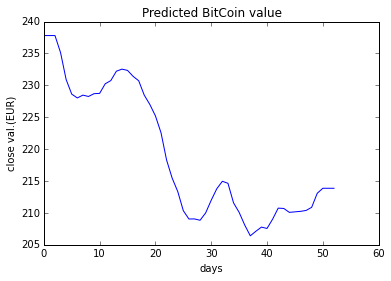

In [44]:
X = [ [x] for x in bcdf.index]
y = bcdf['Close']

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X, list(y.values))

Y = [list(neigh.predict([[i]]))[0] for i in range(len(X))]

plt.title("Predicted BitCoin value")
plt.xlabel('days')
plt.ylabel('close val.(EUR)')
plt.plot(Y)

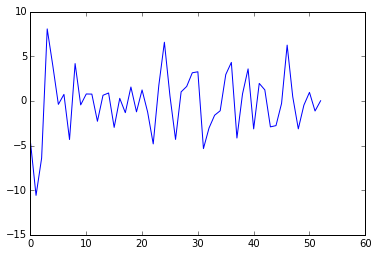

In [45]:
errors = [ Yi-yi for Yi, yi in zip(Y, y)]

plt.plot(errors)

In [46]:
import numpy as np

print("Error mean: {} ".format(np.mean(errors)))

Error mean: -0.201473207547 


### Tomorrow's prediction

In [47]:
print("Tomorrow's predicted closing value {}".format(neigh.predict([[60]])))

Tomorrow's predicted closing value [ 213.865732]
